In [173]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

### 목표
 - 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자 
 - 머신러닝 전체 과정을 진행해보자 
 
#### 1. 문제 정의
 - 생존/사망을 예측해보자 
 - kaggle 경진대회 높은 순위를 차지해보자 
 
#### 2. 데이터 수집(불러와서 확인) 

- q1. 타이타닉 train데이터와 test데이터를 변수 train, test에 저장하기 ( 단,passengerID 컬럼을 불러오면서 인덱스로 설정해서 불러오기)

In [174]:
# csv -> pd.read_csv()
# 컬럼인걸 인덱스 설정하는 키워드
train = pd.read_csv('./data/titanic/train.csv', index_col = 'PassengerId')
test = pd.read_csv('./data/titanic/test.csv', index_col = 'PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
print('훈련 데이터 크기:', train.shape)
print('테스트 데이터 크기:', test.shape)

훈련 데이터 크기: (891, 11)
테스트 데이터 크기: (418, 10)


#### 3. 데이터 전처리 및 데이터 탐색

In [176]:
# train - info
train.info()
# 결측치 있는 컬럼 o : Age, Cabin, Embarked
# 데이터 타입 : 숫자(정수,실수), 문자열 
# - 모델은 문제 데이터를 숫자인 것만 이해할 수 있음.
# 문자 -> 숫자 : 인코딩(라벨인코딩, 원핫인코딩)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [177]:
# test - info()
test.info()
# Survived x - 생존/사망 데이터가 없음 
# y_test kaggle 이 알고있음 
# 경진대회 데이터는 테스트 문제까지만 제공 
# 결측치 컬럼 o : Age, Fare, Cabin
# 데이터 타입: 숫자(정수,실수), 문자열

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [178]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [179]:
# 컬럼 정보 정리 
train.columns
# 'Survived', 생존/사망 결과 값이 담긴 컬럼(0:사망, 1:생존)
# 'Pclass', 승객 등급(1:상위층,2:중상위층,3:하위층)
# 'Name'
# 'Sex'
# 'Age'
# 'SibSp', 형제자매/배우자의 수 (같이 탑승한)
# 'Parch'
# 'Ticket', 티켓 번호
# 'Fare' 등급
# 'Cabin'
# 'Embarked', 승선지

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Available features *
PassengerId - Passenger ID - Number  
Survived - Survived - Bool  
Pclass - Ticket class - available 1 = 1st, 2 = 2nd, 3 = 3rd - Number  
Name - First name, Last Name and optional Title - String  
Sex - Sex of passenger - available: male and female - String  
Age - Age in years - Number  
SibSp - of siblings / spouses aboard the Titanic - Number  
Parch - of parents / children aboard the Titanic - Number  
Ticket - Ticket Id - String  
Fare - Passenger fare / Ticker price - Number  
Cabin - Cabin number - String  
Embarked - Port of Embarkation - available C = Cherbourg, Q = Queenstown, S = Southampton - String  

- train: Embarked 컬럼 결측치 채우기

In [180]:
# 데이터 확인 -> train 기준으로 확인 
# 왜? 종은 모델 만들기 위해서, 일반화된 모델을 만들기 위해서 
# 학습 시키는 데이터 -> train
# train 에서 Embarked 컬럼 인덱싱 => S,C,Q 몇 개씩 있는지 확인 
train['Embarked'].value_counts()
# train.loc[:, 'Embarked']
# train.iloc[:,-1]
# train['Embarked'] 결측치가 몇 개 있는지? 2개
train['Embarked'].isnull().sum()
# train['Embarked'] 결측치가 있는 데이터 출력해보기 
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [181]:
# 두사람의 데이터가 서로 비슷 
# 같은 승선항에서 탔을 것이다 가정 
# 사람이 가장 많이 탑승한 장소의 승선항 값으로 채워보기 
# 1. 하나씩 인덱싱 접근 train.loc[62,'Embarked'] = 'S'
# fillna(값) : 비어 있다면 값으로 대체하는 함수 
train['Embarked'] = train['Embarked'].fillna('S')

In [182]:
train['Embarked'].isnull().sum()

0

- test: Fare 컬럼 결측치 채우기 

In [183]:
# test 데이터 Fare 인덱싱 후 결측치가 존재하는 행 출력 
# isnull(), 불리언 인덱싱
test[test['Fare'].isnull()] 
# pclass 에 연관되지 않았을까?
# 성별에 연관되지 않았을까?
# iris 참고
train.corr() # 문자열로 된 컬럼 포함 -> 상관계수 x
# Fare컬럼과 연관이 있는 컬럼은 뭘까? Pclass
# -1 ~ 1 표현되는 상관계수
# -1, +1 가까울수록 상관이 어느정도 높음
# 0 가까울수록 상대적으로 상관관계가 덜함(적음)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_18536\3593590869.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr() # 문자열로 된 컬럼 포함 -> 상관계수 x


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [184]:
# train Fare 컬럼 기술통계량 확인하기 
# describe()
# 중앙값, 평균값을 대표값을 선택할건지 확인 
train['Fare'].describe() # 중앙값을 대표값으로 선택 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

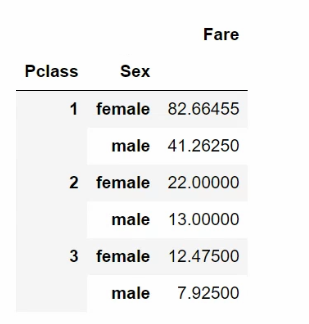

In [185]:
# Pclass, Sex, -> Fare 중앙, 평균 값으로 결측치를 대체해보자 
# 1, female -> Fare 중앙값, 평균값을 확인하고 해당 값으로 채워보자 
# 1, male -> Fare 중앙값, 평균값
# 3, 남성 -> Fare 중앙값, 평균값을 확인해서 결측치 처리해야함
# test['Fare'] 3등급, 남성 중앙값
# train 데이터를 기준으로 승객 등급, 성별 그룹핑(groupby)
# 중앙값 median()
train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass','Sex']).median()

# test['Fare'] 결측치 채워주기 7.92500
# 1. 인덱싱 2. fillna
test['Fare'] = test['Fare'].fillna(7.92500)
test['Fare'].isnull().sum() # 처리 확인

0

In [186]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


- Age 결측치 채우기 
    - train, test 모두 처리 
    - 나이의 평균, 중앙값으로 결측치를 채워보기 
    - 다른 컬럼과의 상관관계를 이용하여 결측치를 채워보기 

In [187]:
# 기술 통계량
# 중앙값 vs 평균값? 평균값(mean)
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [188]:
# Age 컬럼과 상관관계가 높은 컬럼 찾아보기  ? Pclass
train.corr()['Age'].abs().sort_values(ascending = False)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_18536\3414887632.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Age'].abs().sort_values(ascending = False)


Age         1.000000
Pclass      0.369226
SibSp       0.308247
Parch       0.189119
Fare        0.096067
Survived    0.077221
Name: Age, dtype: float64

In [189]:
# Pclass, Sex, Age 컬럼의 평균값 출력해보기 
# 1 - female , age 평균 
# 1 - malem, age 평균
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass','Sex']).mean()
gb1

# gb1 3등급, male 나이 평균값 접근해보기 
# 중복인덱스(멀티인덱스) 접근 방법: gb1.loc[(3, 'male')]
gb1.loc[(3,'male')]

# 1등급 여성 나이 평균 출력해보기 
gb1.loc[(1, 'female')]

Age    34.611765
Name: (1, female), dtype: float64

In [195]:
# train, test
train[train['Age'].isnull()]
# 결측치 채우기 위해서 각 승객의 등급, 성별을 확인한 후 Age 평균값을 인덱싱하여 채움
# 판다스객체.apply(나이결측치처리기능)
def prepro_age(row):
    # 만약 나이가 결측치라면 값을 가져오고 
    # row 1사람의 정보
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'], row['Sex'])]
    # 만약 나이가 결측치가 아니라면 원래 나이값을 그대로 사용하자
    else:
        return row['Age']
train['Age'] = train.apply(prepro_age, axis = 1)
train['Age'].isnull().sum()

# 1 한사람의 대한 데이터가 row
# 0 컬럼 하나가 row에 처리하는 단위로 들어감
# test['Age'] 컬럼도 격측치 처리 , train(gb1) 그대로 사용

0

In [198]:
test['Age'] = test.apply(prepro_age, axis = 1)
test['Age'].isnull().sum()
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')
# run all

- train, test: Cabin(객실번호) 채우기

In [199]:
# train['Cabin'] 결측치 몇 개 있는지?
train['Cabin'].isnull().sum() # 절반 이상이 결측치

687

In [200]:
# 중복없이 값 확인 
# unique()
train['Cabin'].unique()
# 층+방번호 -> C85
# 결측치에다가 임의로 'M' 값으로 채워보기 
# fillna()
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [201]:
# Deck 컬럼에서 맨 첫글자 알파벳만 추출하기 
# train['Deck'][2][0]
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [202]:
# Cabin 컬럼 삭제 
# train, test
# 대상.drop('삭제할이름', axis = 1)
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [203]:
# 결과 확인 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 115.8+ KB


#### 데이터 탐색

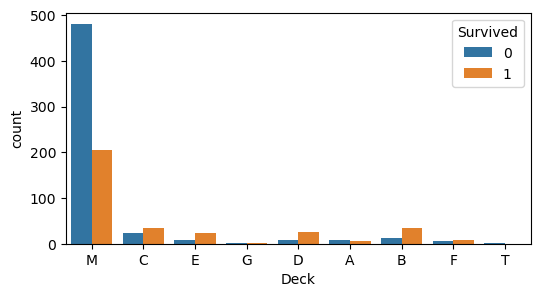

In [204]:
# 'M' -> Deck
# Deck과 Survived 컬럼 연관성 확인하기 
# 막대그래프 활용 
# train -> 학습에 영향을 주는 데이터 -> 데이터 탐색 train 기준으로 함 
plt.figure(figsize=(6,3))
sns. countplot(data = train, x = 'Deck', hue = 'Survived')
plt.show()

In [205]:
# M에서 상대적으로 사람이 많이 사망함 
# survived 영향을 주지는 않을까?

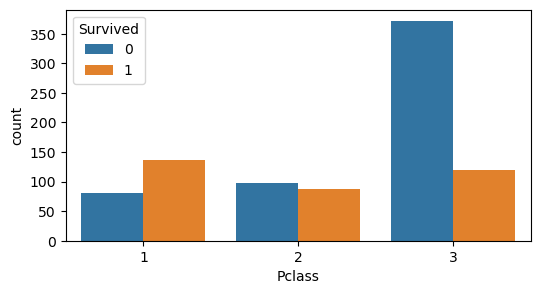

In [206]:
# Pclass와 Survived 시각화 
# countplot
# 생존/사망 의미 파악해보기 
plt.figure(figsize=(6,3))
sns.countplot(data = train, x = "Pclass", hue = "Survived")
plt.show()

In [207]:
# 1등급 - 비교적 생존율 높음 
# 2등급 - 사망율이 조금 높음
# 3등급 - 사망율이 월등히 높음 

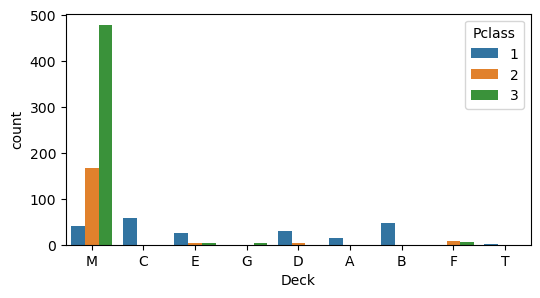

In [208]:
# Deck과 Pclass 연관지어서 시각화 
# X - Deck ,
# hue = Pclass
plt.figure(figsize=(6,3))
sns.countplot(data = train, x = "Deck", hue = "Pclass")
plt.show()

In [209]:
# M에서 사망율이 높았던 건 3등급의 사람이 많아서였음 
# Deck 컬럼이 생존/사망 크게 영향을 주고 있는 것은 아님 
# 오히려 Pclass 영향이 크게 미치고 있음 

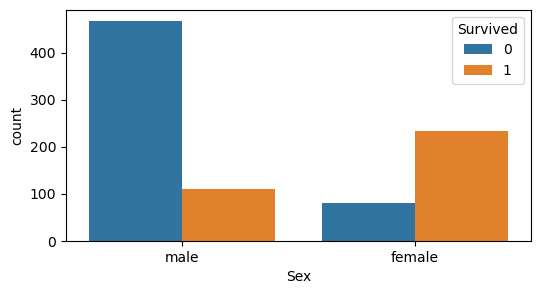

In [210]:
# Sex와 Survived 시각화
plt.figure(figsize=(6,3))
sns.countplot(data = train, x = "Sex", hue = "Survived")
plt.show()

In [211]:
# 남성 상대적으로 사망율 높음
# 여성 상대적으로 생존율 높음 
# 생존/사망 판별 하는데 Sex 도움이 되겠군 

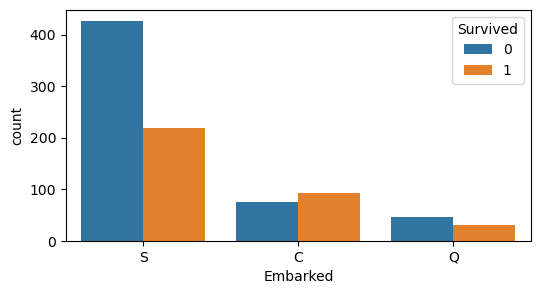

In [212]:
# Embarked와 Survived 시각화
plt.figure(figsize=(6,3))
sns.countplot(data = train, x = "Embarked", hue = "Survived")
plt.show()

In [213]:
# 승선항 생존/사망 크게 영향을 주지 않았겠군

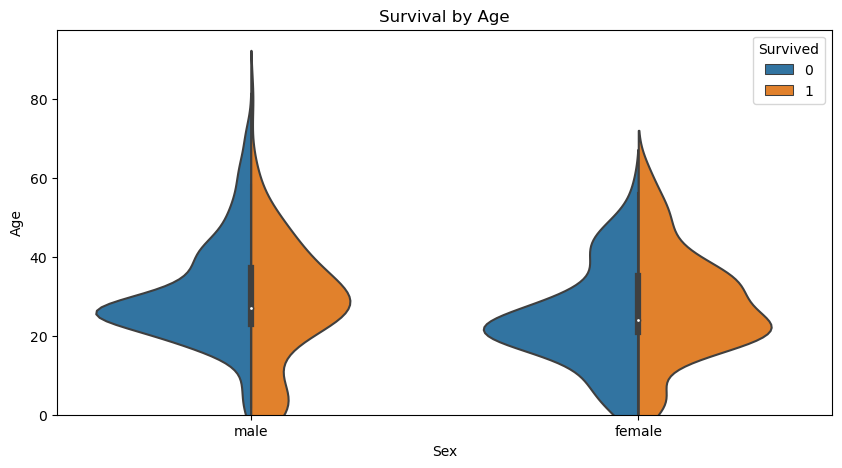

In [214]:
# Age와 Survived 연관성 확인하기 
# violin plot - 바이올린 모양 그래프 
# 데이터의 분포를 확인할 때 사용하는 방법 
plt.figure(figsize = (10,5))
sns.violinplot(x='Sex', y='Age',hue = 'Survived', data=train, split = True)
plt.title("Survival by Age")
plt.ylim(0)
plt.show()

In [215]:
# 20대~40대 남자 같은 경우에는 사망율이 높음 
# 20~30대 여자 같은 경우에는 사망율이 높음 

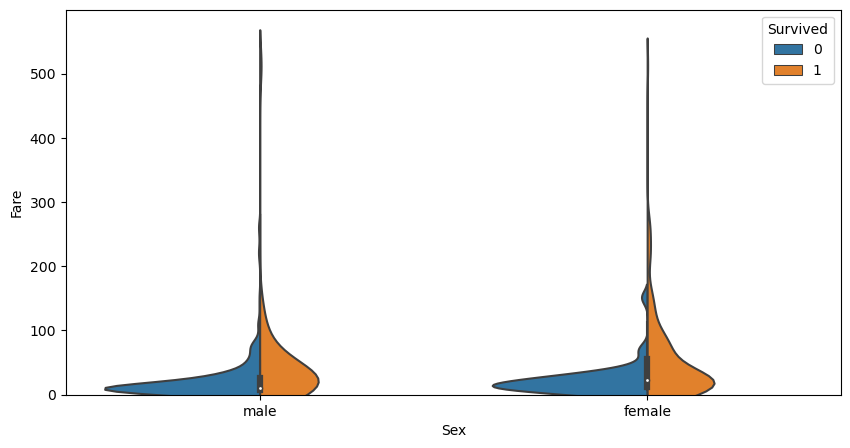

In [216]:
# Sex x
# Fare - y
# hue - Survived 
plt.figure(figsize = (10,5))
sns.violinplot(x='Sex', y='Fare',hue = 'Survived', data=train, split = True)
plt.ylim(0)
plt.show()

In [217]:
sns.__version__

'0.12.2'

In [218]:
# 요금이 저렴한 사람은 상대적으로 많이 사망함

- Parch, sibSp - 부모자식, 형제배우자 
  - 특성공학: 두개의 컬럼을 더해서 가족의 숫자라는 새로운 컬럼 생성
  - train, 생성하면 test 동일하게 적용 

In [219]:
# Parch + Sibsp + 1
train['Family_size'] = train['Parch'] + train['SibSp'] + 1
test['Family_size'] = train['Parch'] + train['SibSp'] + 1

In [220]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Deck         891 non-null    object 
 11  Family_size  891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 122.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Name

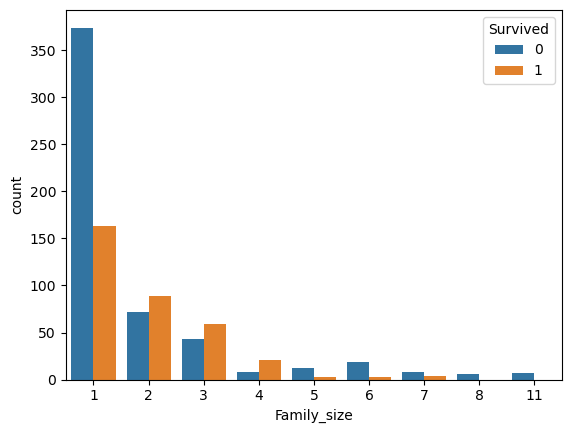

In [221]:
# 시각화 
# countplot
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')
plt.show()

In [222]:
# 1 명 - 사망율 
# 2 ~4명 - 생존율 높음 
# 5 이상 - 사망율 
# 범주를 줄일 것 -> binning(사소한 관찰오류를 줄일 수 있음)

In [223]:
# 가족사이즈가 1이면 Alone, 2~4명 Small, 5명 이상 Large 
# train , test 적용
# pd.cut()
bins = [0,1,4,11]
labels = ['Alone', 'Small', 'Large']
train['Family_group'] = pd.cut(train['Family_size'], bins = bins, labels = labels)
test['Family_group'] = pd.cut(train['Family_size'], bins = bins, labels = labels)

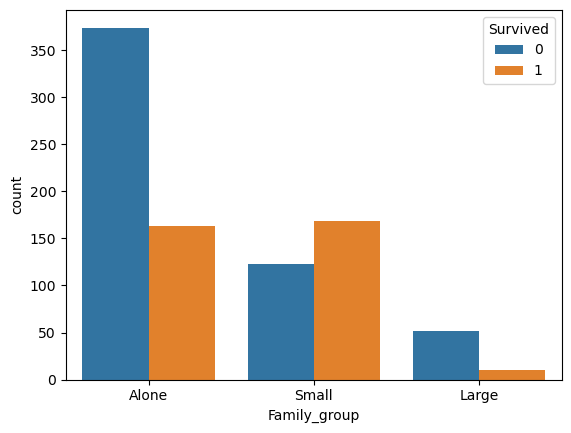

In [224]:
sns.countplot(data = train, x = 'Family_group', hue = 'Survived')
plt.show()

- 불필요한 컬럼 삭제 
  - Name, Ticket, Family_size

In [225]:
# train 
train.drop(['Name', 'Ticket', 'Family_size'], axis = 1, inplace = True)

In [226]:
# test 
test.drop(['Name', 'Ticket', 'Family_size'], axis = 1, inplace = True)

In [227]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   SibSp         418 non-null    int64   
 4   Parch         418 non-null    int64   
 5   Fare          418 non-null    float64 
 6   Embarked      418 non-null    object  
 7   Deck          418 non-null    object  
 8   Family_group  0 non-null      category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 29.9+ KB


In [228]:
# 문제와 답 분리 
# X_train = train.drop('Survived', axis = 1) # Survived 제외한 나머지 컬럼 문제데이터
# X_train = train.iloc[:,1:] # Survived 제외한 나머지 컬럼 문제데이터
X_train = train.loc[:,'Pclass':] # Survived 제외한 나머지 컬럼 문제데이터
y_train = train['Survived']# Survived
X_test = test 

In [229]:
# 크기확인 
print('훈련문제:', X_train.shape)
print('훈련답:', y_train.shape)
print('테스트문제:', X_test.shape)

훈련문제: (891, 9)
훈련답: (891,)
테스트문제: (418, 9)


In [230]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 95.9+ KB


In [231]:
# 인코딩이 필요한 컬럼 
# cat_choice = ['Sex', 'Embarked', 'Deck', 'Family_group']
cat_filter = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
cat_choice = X_train.columns[cat_filter]

In [232]:
# 원핫인코딩 
# pandas -> pd.get_dummies(대상)
X_train_ca_oh = pd.get_dummies(X_train[cat_choice])
X_test_ca_oh = pd.get_dummies(X_test[cat_choice])

# X_train 병합하기 
# pd.concat()
X_train = pd.concat([X_train, X_train_ca_oh], axis = 1)
X_test = pd.concat([X_test, X_test_ca_oh], axis = 1)

# 원핫인코딩 하기 전의 범주형 컬럼은 삭제 
X_train.drop(cat_choice, axis = 1, inplace = True)
X_test.drop(cat_choice, axis = 1, inplace = True)

In [233]:
# 크기확인 
X_train.shape, X_test.shape

((891, 22), (418, 21))

In [234]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [235]:
# Dect_T -> test
# T -> 0(False)
X_test['Deck_T'] = 0
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large', 'Deck_T'],
      dtype='object')

In [236]:
# X_train 컬럼의 순서를 
# X_test 적용 
X_test = X_test[X_train.columns]
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [237]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   Fare                418 non-null    float64
 5   Sex_female          418 non-null    uint8  
 6   Sex_male            418 non-null    uint8  
 7   Embarked_C          418 non-null    uint8  
 8   Embarked_Q          418 non-null    uint8  
 9   Embarked_S          418 non-null    uint8  
 10  Deck_A              418 non-null    uint8  
 11  Deck_B              418 non-null    uint8  
 12  Deck_C              418 non-null    uint8  
 13  Deck_D              418 non-null    uint8  
 14  Deck_E              418 non-null    uint8  
 15  Deck_F              418 non-null    uint8  
 16  Deck_

### 모델 선택 및 학습

In [238]:
# tree 임포트 
from sklearn.tree import DecisionTreeClassifier # 트리 분류 모델
# 모델 객체 생성 
tree_model = DecisionTreeClassifier()
# 모델 학습 
tree_model.fit(X_train, y_train)
# 모델 예측
pre = tree_model.predict(X_test)
#gender_submission 파일 불러오기 - Survived 컬럼 예측값으로 변경 
# 예측값을 담은 df를 csv 파일로 저장 
#저장할데이터.to_csv('경로 및 파일명', index = False)
# pre
result = pd.read_csv('./data/titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('./data/submission01_sjy.csv', index = False)

In [239]:
# 과대적합 키워드를 설정하여 모델 학습 후 예측
# kaggle 재제출
# skan rlvdl max_depth =5

tree_model2 = DecisionTreeClassifier(max_depth =5)
# 해당 모델의 성능이 얼마나 되는지 확인하는 방법
# 교차검증
from sklearn.model_selection import cross_val_score
cv_result1 = cross_val_score(tree_model, X_train, y_train, cv =5) # tree_model
cv_result2 = cross_val_score(tree_model2, X_train, y_train, cv =5) # tree_model2
print('1모델: ', cv_result1, '\n', cv_result1.mean())
print('2모델: ', cv_result2, '\n', cv_result2.mean())

1모델:  [0.7877095  0.78089888 0.83707865 0.76404494 0.81460674] 
 0.79686774213797
2모델:  [0.82122905 0.78089888 0.8258427  0.76966292 0.86516854] 
 0.812560416797439


In [240]:
# tree_model2 학습, 예측
tree_model2.fit(X_train, y_train)
pre2 = tree_model2.predict(X_test)
pre
# kaggle 업로드 해보기 
result2 = pd.read_csv('./data/titanic/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('./data/submission02_sjy.csv', index = False)

- 특성 중요도 
  - 모델이 선택한 중요한 특성 확인하기 
 

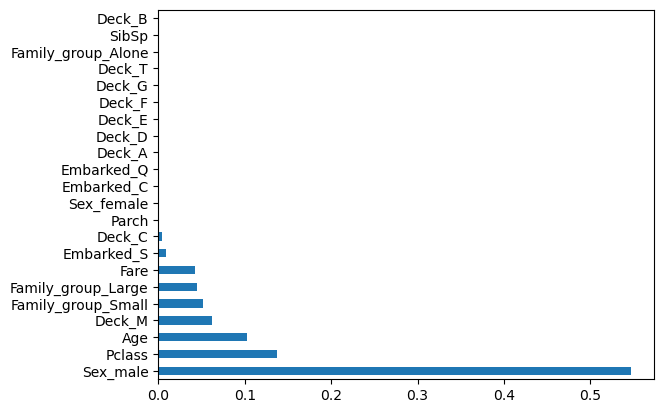

In [243]:
# tree_model2 특성 중요도 값 확인해보기
fi = tree_model2.feature_importances_
fi
# Series
fi_s = pd.Series(fi, index = X_train.columns)
fi_s.sort_values(ascending = False).head()
fi_s.sort_values(ascending = False).plot.barh()
plt.show()